* Bootstrap data >> 1 Decision Tree
* max_features >> to select max features >> sqrt(total no of features)
* Out of Bag >> OOB >> OOB Score 
* All bootstrap data will be unique
* OOB Score >> no of correctly classified OOB samples / total no of OOB samples
* OOB error >> total no of incorrectly classified OOB samples / total no of OOB samples
* Voting Classifier 
1. Hard Voting 
2. Soft Voting

1. Hard Voting >>   
                    0    1    
* Model1 Output >> [90  10] majority > 0 class
* Model2 Output >> [80  20] majority > 0 class
* Model3 Output >> [10  90] majority > 1 class

in above example 0 class is in majority , so output will be 0 class

2. Soft Voting >>
                    0    1    
* Model1 Output >> [90  10] 
* Model2 Output >> [80  20] 
* Model3 Output >> [10  90]

* in this example we will take mean of 0 class >> 90+80+10/3 >> 60 class 0
* in this example we will take mean of 1 class >> 10+20+90/3 >> 40 class 1
* as the mean of the class 0 is higher so class 0 will be selected as output

> hyperparameter >> 
1. n_estimators >> no of decision trees
2. criterion >> gini,entropy,MSE,MAE
3. min_sample_split >> 2
4. min_sample_leaf >> 1
5. max_depth >> none 
6. max_features >> auto (sqrt[no of features])
7. OOB score >> False
8. Bootstrap >> True


In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from imblearn.over_sampling import SMOTE,RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [42]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

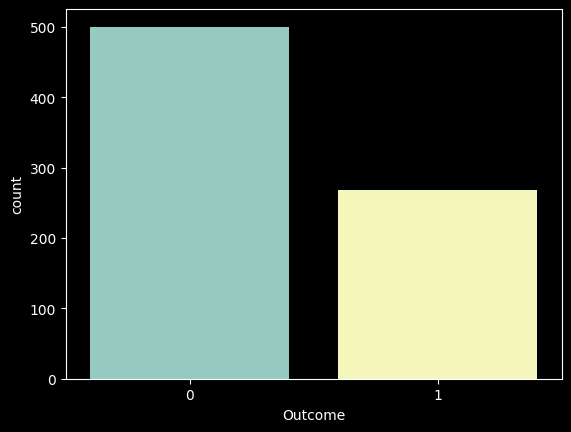

In [43]:
sns.countplot(x=df["Outcome"])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [45]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Sampling

In [46]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [47]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [48]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)


In [50]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
139,105,72,29,325,36.900000,0.159000,28
619,119,0,0,0,32.400000,0.141000,24
643,90,0,0,0,28.000000,0.610000,31
218,85,74,22,0,29.000000,1.224000,32
846,170,109,25,239,44.785184,0.677175,53
...,...,...,...,...,...,...,...
871,175,76,43,475,35.430079,1.592395,37
159,163,72,41,114,40.900000,0.817000,47
286,155,84,44,545,38.700000,0.619000,34
351,137,84,0,0,31.200000,0.252000,30


In [51]:
y_test

141    0
932    1
116    1
245    1
879    1
      ..
251    0
795    1
162    0
508    0
422    0
Name: Outcome, Length: 200, dtype: int64

Model Building

1.Decision Tree

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

Training data Evaluation

In [53]:
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing data evaluation

In [54]:
y_pred_test=dt_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[76 24]
 [25 75]]
********************************************************************************
Accuracy score:  0.755
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



2. Random Forest

In [55]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

Training data Evaluation

In [56]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing Data Evaluation

In [57]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[79 21]
 [13 87]]
********************************************************************************
Accuracy score:  0.83
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       100
           1       0.81      0.87      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Hyperparameter tuning

In [58]:
rf_model = RandomForestClassifier()
n_estimators=100, # No. decison Tree
criterion='gini', # gini entrpoy
max_depth=None,  # Depth of DT
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt'
bootstrap=True,
oob_score=False,
n_jobs=None,

hyperparameters = {"n_estimators":np.arange(10,200),
                   "criterion":["gini","entropy"],
                   "max_depth":np.arange(3,8),
                   "min_samples_split":np.arange(4,20),
                   "min_samples_leaf":np.arange(3,10),
                   "max_features":[7]}
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv=5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [59]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_samples_leaf=3, min_samples_split=9,
                       n_estimators=157)

# Regressor

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE,RandomOverSampler

import warnings
warnings.filterwarnings("ignore")


In [61]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [62]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [63]:
x=df.drop("medv",axis=1)
y=df["medv"]

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)


Model Building

In [65]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)


RandomForestRegressor()

Training Data Evaluation

In [66]:
y_pred_train=rf_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean squared error: ", mse)
print("*"*80)
rmse=np.sqrt(mse)
print("root mean squared error: ", rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean absolute error: ", mae)
print("*"*80)
R2=r2_score(y_train,y_pred_train)
print("R2 score : ", R2)

Mean squared error:  1.480781138613862
********************************************************************************
root mean squared error:  1.216873509701753
********************************************************************************
Mean absolute error:  0.8240099009900991
********************************************************************************
R2 score :  0.9825801384322974


Testing data evaluation


In [67]:
y_pred_test=rf_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print("Mean squared error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_test)
print("Mean absolute error: ",mae)
print("*"*80)
R2=r2_score(y_test,y_pred_test)
print("R2 score: ",R2)

Mean squared error:  10.083774323529424
********************************************************************************
Root mean squared error:  3.1754959177315003
********************************************************************************
Mean absolute error:  2.255754901960786
********************************************************************************
R2 score:  0.8765911419707135


# classifier

In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [69]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [70]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

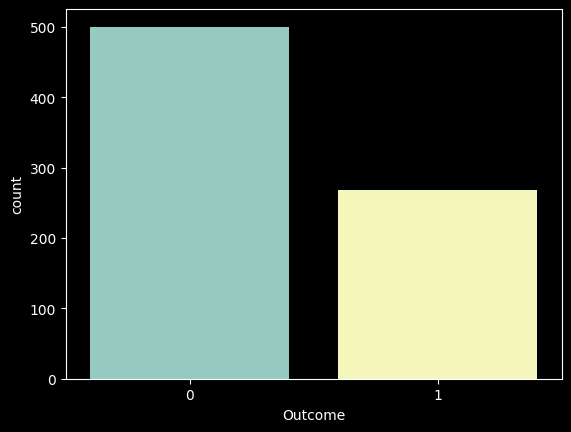

In [71]:
sns.countplot(x=df["Outcome"])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Train test split 

In [73]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

Sampling

In [74]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [75]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [76]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)


In [78]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
450,82,64,13,95,21.200000,0.415000,23
776,156,89,31,21,28.863283,0.774782,45
161,102,74,40,105,37.200000,0.204000,45
56,187,68,39,304,37.700000,0.254000,41
35,103,60,33,192,24.000000,0.966000,33
...,...,...,...,...,...,...,...
866,109,90,31,45,35.063874,0.711630,27
581,109,60,27,0,25.000000,0.206000,27
602,124,74,36,0,27.800000,0.100000,30
686,130,64,0,0,23.100000,0.314000,22


In [79]:
y_test

797    1
149    0
691    1
427    1
238    1
      ..
528    0
6      1
52     0
796    1
947    1
Name: Outcome, Length: 200, dtype: int64

MOdel Building 

1. Decision Tree 

In [80]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

Training data evaluation

In [81]:
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing data evaluation


In [82]:
y_pred_test=dt_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[79 21]
 [20 80]]
********************************************************************************
Accuracy score:  0.795
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.79      0.80      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



2. Random Forest

In [83]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

Training data Evaluation

In [84]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing data evaluation

In [85]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[83 17]
 [15 85]]
********************************************************************************
Accuracy score:  0.84
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.83      0.85      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



Hyperparameter tuning

* n_estimators = 100 >> No of decision tree
* criterion = "gini" >> gini entropy 
* max_depth = None >> depth of decision tree
* min_samples_split = 2 
* min_samples_leaf = 1
* max_features = sqrt
* bootstrap = TRUE
* oob_score = FALSE 
* n_jobs = None


In [86]:
rf_model = RandomForestClassifier()
hyperparameters = {"n_estimators":np.arange(10,200),
                   "criterion":["gini","entropy"],
                   "max_depth":np.arange(3,8),
                   "min_samples_split":np.arange(4,20),
                   "min_samples_leaf":np.arange(3,10),
                   "max_features":[7],
                   "random_state":[11],
                   "oob_score":[True],
                   "verbose":[2]}
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv=5)
rscv_rf_model.fit(x_train,y_train)


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
buildi

building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of 54
building tree 46 of 54
building tree 47 of 54
building tree 48 of 54
building tree 49 of 54
building tree 50 of 54
building tree 51 of 54
building tree 52 of 54
building tree 53 of 54
building tree 54 of 54
building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of 54
building tree 46 of 54
building tree 47 of 54
building tree 48 of 54
building tree 49 of 54
building tree 50 of 54
building tree 51 of 54
building tree 52 of 54
building tree 53 of 54
building tree 54 of 54
building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 53 of 54
building tree 54 of 54
building tree 1 of 54
building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of 54
building tree 46 of 54
building tree 47 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 144
building tree 2 of 144
building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building t

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 106 of 144
building tree 107 of 144
building tree 108 of 144
building tree 109 of 144
building tree 110 of 144
building tree 111 of 144
building tree 112 of 144
building tree 113 of 144
building tree 114 of 144
building tree 115 of 144
building tree 116 of 144
building tree 117 of 144
building tree 118 of 144
building tree 119 of 144
building tree 120 of 144
building tree 121 of 144
building tree 122 of 144
building tree 123 of 144
building tree 124 of 144
building tree 125 of 144
building tree 126 of 144
building tree 127 of 144
building tree 128 of 144
building tree 129 of 144
building tree 130 of 144
building tree 131 of 144
building tree 132 of 144
building tree 133 of 144
building tree 134 of 144
building tree 135 of 144
building tree 136 of 144
building tree 137 of 144
building tree 138 of 144
building tree 139 of 144
building tree 140 of 144
building tree 141 of 144
building tree 142 of 144
building tree 143 of 144
building tree 144 of 144
building tree 1 of 144


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 144
building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building tree 15 of 144
building tree 16 of 144
building tree 17 of 144
building tree 18 of 144
building tree 19 of 144
building tree 20 of 144
building tree 21 of 144
building tree 22 of 144
building tree 23 of 144
building tree 24 of 144
building tree 25 of 144
building tree 26 of 144
building tree 27 of 144
building tree 28 of 144
building tree 29 of 144
building tree 30 of 144
building tree 31 of 144
building tree 32 of 144
building tree 33 of 144
building tree 34 of 144
building tree 35 of 144
building tree 36 of 144
building tree 37 of 144
building tree 38 of 144
building tree 39 of 144
building tree 40 of 144
building tree 41 of 144
building tree 42 of 144
building tree 43 of 144


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 144
building tree 2 of 144
building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building tree 15 of 144
building tree 16 of 144
building tree 17 of 144
building tree 18 of 144
building tree 19 of 144
building tree 20 of 144
building tree 21 of 144
building tree 22 of 144
building tree 23 of 144
building tree 24 of 144
building tree 25 of 144
building tree 26 of 144
building tree 27 of 144
building tree 28 of 144
building tree 29 of 144
building tree 30 of 144
building tree 31 of 144
building tree 32 of 144
building tree 33 of 144
building tree 34 of 144
building tree 35 of 144
building tree 36 of 144
building tree 37 of 144
building tree 38 of 144
building tree 39 of 144
building tree 40 of 144
building tree 41 of 144
building tree 42 of 144
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 144
building tree 2 of 144
building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building tree 15 of 144
building tree 16 of 144
building tree 17 of 144
building tree 18 of 144
building tree 19 of 144
building tree 20 of 144
building tree 21 of 144
building tree 22 of 144
building tree 23 of 144
building tree 24 of 144
building tree 25 of 144
building tree 26 of 144
building tree 27 of 144
building tree 28 of 144
building tree 29 of 144
building tree 30 of 144
building tree 31 of 144
building tree 32 of 144
building tree 33 of 144
building tree 34 of 144
building tree 35 of 144
building tree 36 of 144
building tree 37 of 144
building tree 38 of 144
building tree 39 of 144
building tree 40 of 144
building tree 41 of 144
building tree 42 of 144
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 144
building tree 2 of 144
building tree 3 of 144
building tree 4 of 144
building tree 5 of 144
building tree 6 of 144
building tree 7 of 144
building tree 8 of 144
building tree 9 of 144
building tree 10 of 144
building tree 11 of 144
building tree 12 of 144
building tree 13 of 144
building tree 14 of 144
building tree 15 of 144
building tree 16 of 144
building tree 17 of 144
building tree 18 of 144
building tree 19 of 144
building tree 20 of 144
building tree 21 of 144
building tree 22 of 144
building tree 23 of 144
building tree 24 of 144
building tree 25 of 144
building tree 26 of 144
building tree 27 of 144
building tree 28 of 144
building tree 29 of 144
building tree 30 of 144
building tree 31 of 144
building tree 32 of 144
building tree 33 of 144
building tree 34 of 144
building tree 35 of 144
building tree 36 of 144
building tree 37 of 144
building tree 38 of 144
building tree 39 of 144
building tree 40 of 144
building tree 41 of 144
building tree 42 of 144
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 169
building tree 48 of 169
building tree 49 of 169
building tree 50 of 169
building tree 51 of 169
building tree 52 of 169
building tree 53 of 169
building tree 54

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 169
building tree 48 of 169
building tree 49 of 169
building tree 50 of 169
building tree 51 of 169
building tree 52 of 169
building tree 53 of 169
building tree 54 of 169
building tree 55 of 169
building tree 56 of 169
building tree 57 of 169
building tree 58 of 169
building tree 59 of 169
building tree 60 of 169
building tree 61 of 169
building tree 62 of 169
building tree 63 of 169
building tree 64 of 169
building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 163 of 169
building tree 164 of 169
building tree 165 of 169
building tree 166 of 169
building tree 167 of 169
building tree 168 of 169
building tree 169 of 169
building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 o

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 1 of 26
building tree 2 of 26
building tree 3 of 26
building tree 4 of 26
building tree 5 of 26
building tree 6 of 26
building tree 7 of 26
building tree 8 of 26
building tree 9 of 26
building tree 10 of 26
building tree 11 of 26
building tree 12 of 26
building tree 13 of 26
building tree 14 of 26
building tree 15 of 26
building tree 16 of 26
building tree 17 of 26
building tree 18 of 26
building tree 19 of 26
building tree 20 of 26
building tree 21 of 26
building tree 22 of 26
building tree 23 of 26
building tree 24 of 26
building tree 25 of 26
building tree 26 of 26
building tree 1 of 26
building tree 2 of 26
building tree 3 of 26
building tree 4 of 26
building tree 5 of 26
building tree 6 of 26
building tree 7 of 26
building tree 8 of 26
building tree 9 of 26
building tree 10 of 26
building tree 11 of 26
building tree 12 of 26
building tree 13 of 26
building tree 14 of 26
building tree 15 of 26
building tree 16 of 26
building tree 17 of 26
building tree 18 of 26
buildi

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 131
building tree 2 of 131
building tree 3 of 131
building tree 4 of 131
building tree 5 of 131
building tree 6 of 131
building tree 7 of 131
building tree 8 of 131
building tree 9 of 131
building tree 10 of 131
building tree 11 of 131
building tree 12 of 131
building tree 13 of 131
building tree 14 of 131
building tree 15 of 131
building tree 16 of 131
building tree 17 of 131
building tree 18 of 131
building tree 19 of 131
building tree 20 of 131
building tree 21 of 131
building tree 22 of 131
building tree 23 of 131
building tree 24 of 131
building tree 25 of 131
building tree 26 of 131
building tree 27 of 131
building tree 28 of 131
building tree 29 of 131
building tree 30 of 131
building tree 31 of 131
building tree 32 of 131
building tree 33 of 131
building tree 34 of 131
building tree 35 of 131
building tree 36 of 131
building tree 37 of 131
building tree 38 of 131
building tree 39 of 131
building tree 40 of 131
building tree 41 of 131
building tree 42 of 131
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 39 of 131
building tree 40 of 131
building tree 41 of 131
building tree 42 of 131
building tree 43 of 131
building tree 44 of 131
building tree 45 of 131
building tree 46 of 131
building tree 47 of 131
building tree 48 of 131
building tree 49 of 131
building tree 50 of 131
building tree 51 of 131
building tree 52 of 131
building tree 53 of 131
building tree 54 of 131
building tree 55 of 131
building tree 56 of 131
building tree 57 of 131
building tree 58 of 131
building tree 59 of 131
building tree 60 of 131
building tree 61 of 131
building tree 62 of 131
building tree 63 of 131
building tree 64 of 131
building tree 65 of 131
building tree 66 of 131
building tree 67 of 131
building tree 68 of 131
building tree 69 of 131
building tree 70 of 131
building tree 71 of 131
building tree 72 of 131
building tree 73 of 131
building tree 74 of 131
building tree 75 of 131
building tree 76 of 131
building tree 77 of 131
building tree 78 of 131
building tree 79 of 131
building tree 80

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 131
building tree 2 of 131
building tree 3 of 131
building tree 4 of 131
building tree 5 of 131
building tree 6 of 131
building tree 7 of 131
building tree 8 of 131
building tree 9 of 131
building tree 10 of 131
building tree 11 of 131
building tree 12 of 131
building tree 13 of 131
building tree 14 of 131
building tree 15 of 131
building tree 16 of 131
building tree 17 of 131
building tree 18 of 131
building tree 19 of 131
building tree 20 of 131
building tree 21 of 131
building tree 22 of 131
building tree 23 of 131
building tree 24 of 131
building tree 25 of 131
building tree 26 of 131
building tree 27 of 131
building tree 28 of 131
building tree 29 of 131
building tree 30 of 131
building tree 31 of 131
building tree 32 of 131
building tree 33 of 131
building tree 34 of 131
building tree 35 of 131
building tree 36 of 131
building tree 37 of 131
building tree 38 of 131
building tree 39 of 131
building tree 40 of 131
building tree 41 of 131
building tree 42 of 131
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 68 of 131
building tree 69 of 131
building tree 70 of 131
building tree 71 of 131
building tree 72 of 131
building tree 73 of 131
building tree 74 of 131
building tree 75 of 131
building tree 76 of 131
building tree 77 of 131
building tree 78 of 131
building tree 79 of 131
building tree 80 of 131
building tree 81 of 131
building tree 82 of 131
building tree 83 of 131
building tree 84 of 131
building tree 85 of 131
building tree 86 of 131
building tree 87 of 131
building tree 88 of 131
building tree 89 of 131
building tree 90 of 131
building tree 91 of 131
building tree 92 of 131
building tree 93 of 131
building tree 94 of 131
building tree 95 of 131
building tree 96 of 131
building tree 97 of 131
building tree 98 of 131
building tree 99 of 131
building tree 100 of 131
building tree 101 of 131
building tree 102 of 131
building tree 103 of 131
building tree 104 of 131
building tree 105 of 131
building tree 106 of 131
building tree 107 of 131
building tree 108 of 131
buildin

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building tree 108 of 169
building tree 109 of 169
building tree 110 of 169
building tree 111 of 169
building tree 112 of 169
bui

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building tree 107 of 169
building tree 108 of 169
building tree 109 of 169
building tree 110 of 169
building tree 111 of 169
building tree 112 of 169
building tree 113 of 169
building tree 114 of 169
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 63 of 169
building tree 64 of 169
building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tre

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree 103 of 169
building tree 104 of 169
building tree 105 of 169
building tree 106 of 169
building 

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
buildi

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96
building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 96
building tree 45 of 96
building tree 46 of 96
building tree 47 of 96
building tree 48 of 96
building tree 49 of 96
building tree 50 of 96
building tree 51 of 96
building tree 52 of 96
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 96
building tree 3 of 96
building tree 4 of 96
building tree 5 of 96
building tree 6 of 96
building tree 7 of 96
building tree 8 of 96
building tree 9 of 96
building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96
building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 96
building tree 45 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 96
building tree 2 of 96
building tree 3 of 96
building tree 4 of 96
building tree 5 of 96
building tree 6 of 96
building tree 7 of 96
building tree 8 of 96
building tree 9 of 96
building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96
building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 96
building tree 2 of 96
building tree 3 of 96
building tree 4 of 96
building tree 5 of 96
building tree 6 of 96
building tree 7 of 96
building tree 8 of 96
building tree 9 of 96
building tree 10 of 96
building tree 11 of 96
building tree 12 of 96
building tree 13 of 96
building tree 14 of 96
building tree 15 of 96
building tree 16 of 96
building tree 17 of 96
building tree 18 of 96
building tree 19 of 96
building tree 20 of 96
building tree 21 of 96
building tree 22 of 96
building tree 23 of 96
building tree 24 of 96
building tree 25 of 96
building tree 26 of 96
building tree 27 of 96
building tree 28 of 96
building tree 29 of 96
building tree 30 of 96
building tree 31 of 96
building tree 32 of 96
building tree 33 of 96
building tree 34 of 96
building tree 35 of 96
building tree 36 of 96
building tree 37 of 96
building tree 38 of 96
building tree 39 of 96
building tree 40 of 96
building tree 41 of 96
building tree 42 of 96
building tree 43 of 96
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169
building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 59 of 169
building tree 60 of 169
building tree 61 of 169
building tree 62 of 169
building tree 63 of 169
building tree 64 of 169
building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 10

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.5s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199]),
                                        'oob_score': [True],
                                        'random_state': [11], 'verbose': [2]})

In [87]:
import os
os.cpu_count()

12

In [88]:
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_samples_leaf=4, min_samples_split=15,
                       n_estimators=169, oob_score=True, random_state=11,
                       verbose=2)

In [89]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train, y_train)

building tree 1 of 169
building tree 2 of 169
building tree 3 of 169
building tree 4 of 169
building tree 5 of 169
building tree 6 of 169
building tree 7 of 169
building tree 8 of 169
building tree 9 of 169
building tree 10 of 169


building tree 11 of 169
building tree 12 of 169
building tree 13 of 169
building tree 14 of 169
building tree 15 of 169
building tree 16 of 169
building tree 17 of 169
building tree 18 of 169
building tree 19 of 169
building tree 20 of 169
building tree 21 of 169
building tree 22 of 169
building tree 23 of 169
building tree 24 of 169
building tree 25 of 169
building tree 26 of 169
building tree 27 of 169
building tree 28 of 169
building tree 29 of 169
building tree 30 of 169
building tree 31 of 169
building tree 32 of 169
building tree 33 of 169
building tree 34 of 169
building tree 35 of 169
building tree 36 of 169
building tree 37 of 169
building tree 38 of 169
building tree 39 of 169
building tree 40 of 169
building tree 41 of 169
building tree 42 of 169
building tree 43 of 169
building tree 44 of 169
building tree 45 of 169
building tree 46 of 169
building tree 47 of 169
building tree 48 of 169
building tree 49 of 169
building tree 50 of 169
building tree 51 of 169
building tree 52

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 62 of 169
building tree 63 of 169
building tree 64 of 169
building tree 65 of 169
building tree 66 of 169
building tree 67 of 169
building tree 68 of 169
building tree 69 of 169
building tree 70 of 169
building tree 71 of 169
building tree 72 of 169
building tree 73 of 169
building tree 74 of 169
building tree 75 of 169
building tree 76 of 169
building tree 77 of 169
building tree 78 of 169
building tree 79 of 169
building tree 80 of 169
building tree 81 of 169
building tree 82 of 169
building tree 83 of 169
building tree 84 of 169
building tree 85 of 169
building tree 86 of 169
building tree 87 of 169
building tree 88 of 169
building tree 89 of 169
building tree 90 of 169
building tree 91 of 169
building tree 92 of 169
building tree 93 of 169
building tree 94 of 169
building tree 95 of 169
building tree 96 of 169
building tree 97 of 169
building tree 98 of 169
building tree 99 of 169
building tree 100 of 169
building tree 101 of 169
building tree 102 of 169
building tree

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s


RandomForestClassifier(criterion='entropy', max_depth=7, max_features=7,
                       min_samples_leaf=4, min_samples_split=15,
                       n_estimators=169, oob_score=True, random_state=11,
                       verbose=2)

Training data evaluation

In [90]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[332  68]
 [ 33 367]]
********************************************************************************
Accuracy score:  0.87375
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       400
           1       0.84      0.92      0.88       400

    accuracy                           0.87       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


Testing data evaluation

In [91]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[80 20]
 [15 85]]
********************************************************************************
Accuracy score:  0.825
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.81      0.85      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [92]:
rf_model.feature_importances_

array([0.38520401, 0.06652779, 0.04307718, 0.0419845 , 0.19766751,
       0.10852891, 0.1570101 ])

In [94]:
array = rf_model.feature_importances_


<Axes: >

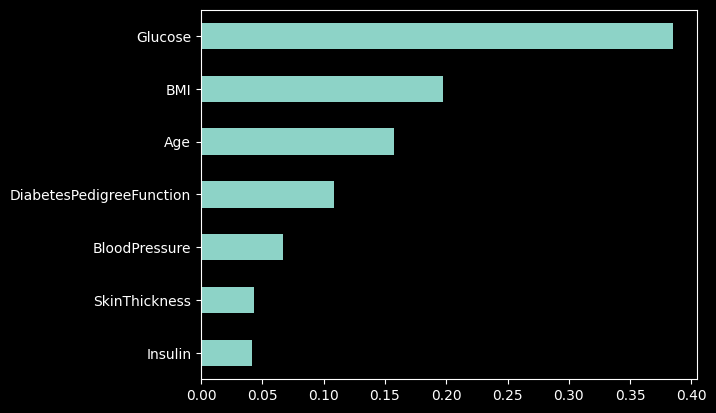

In [95]:
s1=pd.Series(array,index=x.columns)
s1.sort_values().plot(kind="barh")

In [97]:
rf_model.oob_score

True

In [98]:
rf_model.oob_score_

0.775

# classifier without sampling 

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from imblearn.over_sampling import SMOTE,RandomOverSampler


In [100]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [101]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

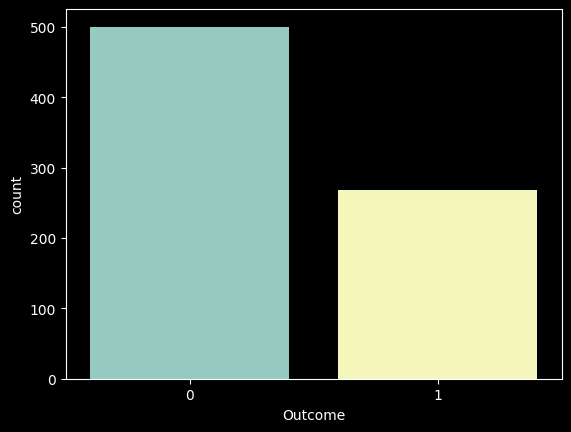

In [102]:
sns.countplot(x=df["Outcome"])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Train test split 

In [104]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

Model Building

1. Decision Tree

In [106]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

Training data evaluation

In [109]:
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 214]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Testing data evaluation

In [108]:
y_pred_test=dt_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[79 21]
 [24 30]]
********************************************************************************
Accuracy score:  0.7077922077922078
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



2. Random Forest

In [110]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

Training data evaluation

In [111]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 214]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Testing data evaluation

In [112]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[87 13]
 [23 31]]
********************************************************************************
Accuracy score:  0.7662337662337663
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



Hyperparameter tuning

In [113]:
rf_model = RandomForestClassifier()
n_estimators = 100 # number of decision trees
criterion = "gini"
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_features = "sqrt"
bootstrap = True
oob_score = False
n_jobs = None

hyperparameters = {"n_estimators":np.arange(10,200),
                   "criterion":["gini","entropy"],
                   "max_depth":np.arange(3,8),
                   "min_samples_split":np.arange(4,20),
                   "min_samples_leaf":np.arange(3,10),
                   "max_features":[7]}
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv=5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [114]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=5, max_features=7, min_samples_leaf=6,
                       min_samples_split=8, n_estimators=88)

In [115]:
rscv_rf_model.best_params_

{'n_estimators': 88,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 7,
 'max_depth': 5,
 'criterion': 'gini'}

In [116]:
import os
os.cpu_count()

12

Model training after Hyperparameter tuning

In [117]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, min_samples_leaf=6,
                       min_samples_split=8, n_estimators=88)

Training data evaluation

In [118]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[366  34]
 [ 58 156]]
********************************************************************************
Accuracy score:  0.8501628664495114
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.82      0.73      0.77       214

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.85      0.85      0.85       614



Testing data evaluation

In [119]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[85 15]
 [19 35]]
********************************************************************************
Accuracy score:  0.7792207792207793
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.70      0.65      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



In [120]:
rf_model.oob_score

False